# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df = pd.read_csv('Feats45_CategAge_APPRDX_Female_Edit.csv')
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 47)


,PATNO,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,3002,1,0,0,0,1,1,0,0,1,...,1,0,1,0,2,1,1,2,1,2
1,3020,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,1,2,2,1,1


In [3]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

(84, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,2,1,2
1,0,0,0,1,0,0,0,0,1,2,...,0,1,0,0,1,1,2,2,1,1


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [4]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8
2
Mean accuracy: 0.75
3
Mean accuracy: 0.7833333333333333
4
Mean accuracy: 0.7833333333333333
5
Mean accuracy: 0.8166666666666667
6
Mean accuracy: 0.7666666666666666
7
Mean accuracy: 0.7333333333333333
8
Mean accuracy: 0.6833333333333333
9
Mean accuracy: 0.7833333333333333
10
Mean accuracy: 0.7833333333333333
11
Mean accuracy: 0.7833333333333333
12
Mean accuracy: 0.9
13
Mean accuracy: 0.6833333333333333
14
Mean accuracy: 0.8
15
Mean accuracy: 0.7833333333333333
16
Mean accuracy: 0.7833333333333333
17
Mean accuracy: 0.7333333333333334
18
Mean accuracy: 0.8166666666666668
19
Mean accuracy: 0.8166666666666668
20
Mean accuracy: 0.7333333333333334
21
Mean accuracy: 0.7
22
Mean accuracy: 0.7666666666666668
23
Mean accuracy: 0.7999999999999999
24
Mean accuracy: 0.8
25
Mean accuracy: 0.7333333333333332
26
Mean accuracy: 0.7666666666666667
27
Mean accuracy: 0.7666666666666667
28
Mean accuracy: 0.7666666666666666
29
Mean accuracy: 0.8333333333333334
30
Mean accuracy: 0.9
31


In [5]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV_Female.csv", index=False)

0.7806666666666665


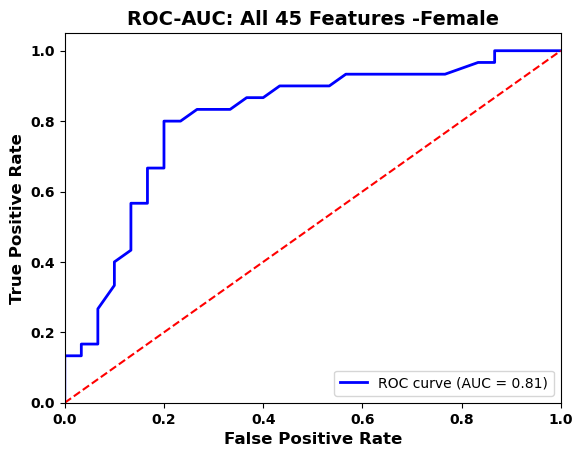

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45FeaturesFemale.svg')
plt.savefig('ROC_AUC_All45FeaturesFemale.pdf')
plt.show()


## RanFor 100 times. Random Samples = 5

In [7]:
df2 = df1.drop (['APPRDX'], axis=1)

In [8]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])
for i in range (1,101) :
        print(i)
        df3 = df2.sample(5, axis=1)
        df3 = df3.reindex(['APPRDX', *df3.columns], axis=1).assign(APPRDX=df1['APPRDX'])
        dataset = df3.groupby('APPRDX').apply(lambda x: x.sample(30))
        X = dataset.iloc[:, 1:].values
        y = dataset.iloc[:, 0].values
        random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
        scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
        mean_score = scores.mean()
        print(f'Mean accuracy: {mean_score}')
        new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
        dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.5333333333333334
2
Mean accuracy: 0.6333333333333333
3
Mean accuracy: 0.7833333333333332
4
Mean accuracy: 0.7333333333333334
5
Mean accuracy: 0.6333333333333333
6
Mean accuracy: 0.6166666666666667
7
Mean accuracy: 0.7833333333333333
8
Mean accuracy: 0.55
9
Mean accuracy: 0.6666666666666666
10
Mean accuracy: 0.6
11
Mean accuracy: 0.8166666666666668
12
Mean accuracy: 0.65
13
Mean accuracy: 0.5666666666666667
14
Mean accuracy: 0.5166666666666666
15
Mean accuracy: 0.5666666666666667
16
Mean accuracy: 0.5333333333333333
17
Mean accuracy: 0.8166666666666667
18
Mean accuracy: 0.8333333333333333
19
Mean accuracy: 0.5666666666666667
20
Mean accuracy: 0.65
21
Mean accuracy: 0.6166666666666667
22
Mean accuracy: 0.43333333333333324
23
Mean accuracy: 0.8
24
Mean accuracy: 0.5333333333333333
25
Mean accuracy: 0.5166666666666666
26
Mean accuracy: 0.4499999999999999
27
Mean accuracy: 0.5833333333333334
28
Mean accuracy: 0.8333333333333334
29
Mean accuracy: 0.5833333333333334
30
Mean

In [9]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Random8Feat_from45Feats_100RF10FCV_Female.csv")

0.6006666666666668


## NMI Top 10

In [10]:
df = pd.read_csv('NMI_All45Feats_Data_Female.csv')
print(df.shape)
df.head(3)

(84, 12)


,PATNO,APPRDX,UPSIT,Montreal_Cognitive,SCOPA_Gastro,MDSP_Constipate,MDSP_Pain,SCOPA_Urine,STAIS,MDSP_Urine,MDSP_LightHead,Lexical_Fluency
0,3002,1,2,0,1,1,1,1,2,1,0,1
1,3020,1,1,0,1,0,1,1,1,0,0,2
2,3021,1,2,0,0,0,0,2,1,1,1,2


In [11]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Montreal_Cognitive,SCOPA_Gastro,MDSP_Constipate,MDSP_Pain,SCOPA_Urine,STAIS,MDSP_Urine,MDSP_LightHead,Lexical_Fluency
0,0,2,0,1,1,1,1,2,1,0,1
1,0,1,0,1,0,1,1,1,0,0,2


In [12]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8833333333333334
2
Mean accuracy: 0.85
3
Mean accuracy: 0.8333333333333333
4
Mean accuracy: 0.85
5
Mean accuracy: 0.8666666666666666
6
Mean accuracy: 0.8166666666666668
7
Mean accuracy: 0.8
8
Mean accuracy: 0.85
9
Mean accuracy: 0.8833333333333334
10
Mean accuracy: 0.8
11
Mean accuracy: 0.7500000000000001
12
Mean accuracy: 0.9333333333333333
13
Mean accuracy: 0.8
14
Mean accuracy: 0.9166666666666666
15
Mean accuracy: 0.8333333333333334
16
Mean accuracy: 0.8666666666666666
17
Mean accuracy: 0.8333333333333334
18
Mean accuracy: 0.8833333333333334
19
Mean accuracy: 0.9
20
Mean accuracy: 0.7666666666666667
21
Mean accuracy: 0.7666666666666666
22
Mean accuracy: 0.8666666666666668
23
Mean accuracy: 0.8333333333333334
24
Mean accuracy: 0.85
25
Mean accuracy: 0.8833333333333334
26
Mean accuracy: 0.8666666666666666
27
Mean accuracy: 0.8166666666666668
28
Mean accuracy: 0.8333333333333333
29
Mean accuracy: 0.9
30
Mean accuracy: 0.9166666666666667
31
Mean accuracy: 0.8666666666

In [13]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inNMI_from45Feats_100RF10FCV_Female.csv")

0.8486666666666663


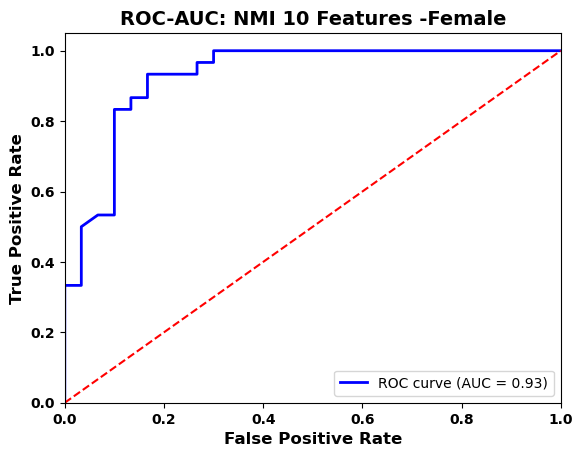

In [14]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 10 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI10Feat.svg')
plt.savefig('ROC_AUC_NMI10Feat.pdf')
plt.show()


## Random Forest All 10

In [15]:
df = pd.read_csv('RanFor_All45Feats_Data_Female.csv')
print(df.shape)
df.head(3)

(84, 12)


,PATNO,APPRDX,UPSIT,Montreal_Cognitive,MDSP_Pain,Semantic,Benton,SCOPA_Thermo,SCOPA_Sex,LetterNumber,MDSP_Constipate,REM_Dream
0,3002,1,2,0,1,0,0,1,1,1,1,2
1,3020,1,1,0,1,1,0,1,0,1,0,1
2,3021,1,2,0,0,1,0,0,0,1,0,0


In [16]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Montreal_Cognitive,MDSP_Pain,Semantic,Benton,SCOPA_Thermo,SCOPA_Sex,LetterNumber,MDSP_Constipate,REM_Dream
0,0,2,0,1,0,0,1,1,1,1,2
1,0,1,0,1,1,0,1,0,1,0,1


In [17]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8166666666666667
2
Mean accuracy: 0.8666666666666668
3
Mean accuracy: 0.8166666666666667
4
Mean accuracy: 0.85
5
Mean accuracy: 0.8333333333333334
6
Mean accuracy: 0.8
7
Mean accuracy: 0.7833333333333334
8
Mean accuracy: 0.7333333333333334
9
Mean accuracy: 0.8833333333333334
10
Mean accuracy: 0.7833333333333332
11
Mean accuracy: 0.7666666666666666
12
Mean accuracy: 0.85
13
Mean accuracy: 0.7333333333333334
14
Mean accuracy: 0.8666666666666666
15
Mean accuracy: 0.7833333333333333
16
Mean accuracy: 0.85
17
Mean accuracy: 0.7666666666666667
18
Mean accuracy: 0.7999999999999999
19
Mean accuracy: 0.85
20
Mean accuracy: 0.7333333333333333
21
Mean accuracy: 0.8166666666666667
22
Mean accuracy: 0.7833333333333333
23
Mean accuracy: 0.8166666666666667
24
Mean accuracy: 0.8
25
Mean accuracy: 0.8166666666666668
26
Mean accuracy: 0.8333333333333333
27
Mean accuracy: 0.7833333333333334
28
Mean accuracy: 0.8166666666666668
29
Mean accuracy: 0.8333333333333333
30
Mean accuracy: 0.86

In [18]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inRanFor_from45Feats_100RF10FCV_Female.csv")

0.8223333333333334


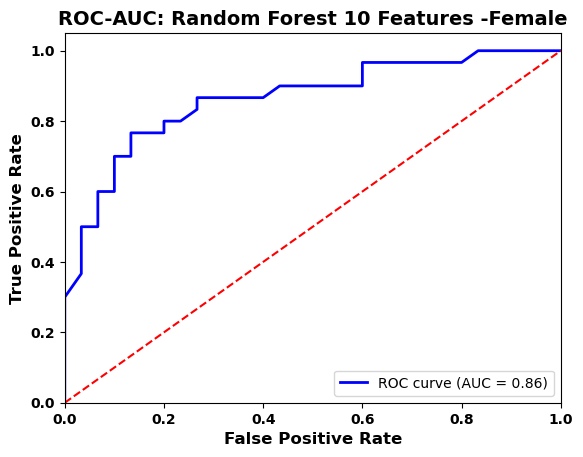

In [19]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Random Forest 10 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_RF10Feat.svg')
plt.savefig('ROC_AUC_RF10Feat.pdf')
plt.show()


## Boruta All 6

In [20]:
df = pd.read_csv('BorutaR_All45Feats_Data_Female.csv')
print(df.shape)
df.head(3)

(84, 6)


,PATNO,APPRDX,MDSP_Constipate,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,3002,1,1,0,1,2
1,3020,1,0,0,1,1
2,3021,1,0,0,0,2


In [21]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,MDSP_Constipate,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,1,0,1,2
1,0,0,0,1,1


In [22]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.85
2
Mean accuracy: 0.8833333333333334
3
Mean accuracy: 0.8666666666666668
4
Mean accuracy: 0.7833333333333334
5
Mean accuracy: 0.8333333333333334
6
Mean accuracy: 0.8
7
Mean accuracy: 0.8833333333333332
8
Mean accuracy: 0.85
9
Mean accuracy: 0.8666666666666666
10
Mean accuracy: 0.85
11
Mean accuracy: 0.8166666666666667
12
Mean accuracy: 0.8833333333333334
13
Mean accuracy: 0.8166666666666668
14
Mean accuracy: 0.8666666666666666
15
Mean accuracy: 0.8
16
Mean accuracy: 0.85
17
Mean accuracy: 0.8
18
Mean accuracy: 0.8666666666666668
19
Mean accuracy: 0.8666666666666668
20
Mean accuracy: 0.7833333333333334
21
Mean accuracy: 0.8333333333333334
22
Mean accuracy: 0.7833333333333333
23
Mean accuracy: 0.8833333333333332
24
Mean accuracy: 0.8333333333333334
25
Mean accuracy: 0.8333333333333333
26
Mean accuracy: 0.8
27
Mean accuracy: 0.85
28
Mean accuracy: 0.85
29
Mean accuracy: 0.85
30
Mean accuracy: 0.9
31
Mean accuracy: 0.8666666666666668
32
Mean accuracy: 0.883333333333333

In [23]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inBoruta_from45Feats_100RF10FCV_Female.csv")

0.8433333333333326


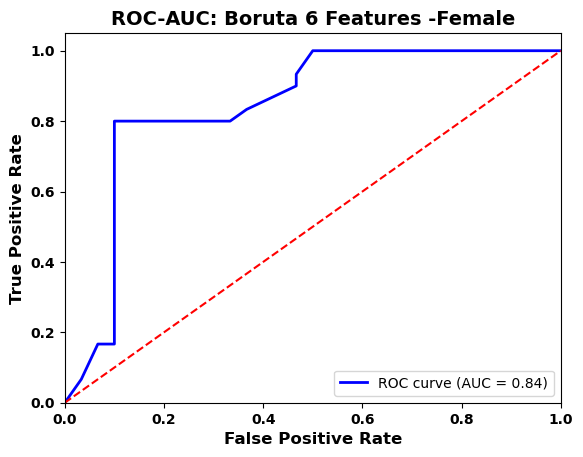

In [24]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Boruta 6 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Boruta10Feat.svg')
plt.savefig('ROC_AUC_Boruta10Feat.pdf')
plt.show()


## Decision Tree All 5

In [25]:
df = pd.read_csv('DecTree_All45Feats_Data_Female.csv')
print(df.shape)
df.head(3)

(84, 7)


,PATNO,APPRDX,UPSIT,MDSP_Constipate,Trail_Making_B,MDSP_Pain,Montreal_Cognitive
0,3002,1,2,1,1,1,0
1,3020,1,1,0,1,1,0
2,3021,1,2,0,1,0,0


In [26]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,MDSP_Constipate,Trail_Making_B,MDSP_Pain,Montreal_Cognitive
0,0,2,1,1,1,0
1,0,1,0,1,1,0


In [27]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7833333333333334
2
Mean accuracy: 0.85
3
Mean accuracy: 0.8333333333333333
4
Mean accuracy: 0.8666666666666668
5
Mean accuracy: 0.7500000000000001
6
Mean accuracy: 0.8166666666666667
7
Mean accuracy: 0.85
8
Mean accuracy: 0.8333333333333334
9
Mean accuracy: 0.8333333333333334
10
Mean accuracy: 0.7666666666666666
11
Mean accuracy: 0.7333333333333334
12
Mean accuracy: 0.85
13
Mean accuracy: 0.7666666666666667
14
Mean accuracy: 0.85
15
Mean accuracy: 0.8166666666666667
16
Mean accuracy: 0.8166666666666667
17
Mean accuracy: 0.8
18
Mean accuracy: 0.85
19
Mean accuracy: 0.85
20
Mean accuracy: 0.7833333333333334
21
Mean accuracy: 0.7833333333333334
22
Mean accuracy: 0.8333333333333334
23
Mean accuracy: 0.8333333333333333
24
Mean accuracy: 0.7833333333333334
25
Mean accuracy: 0.7833333333333332
26
Mean accuracy: 0.7666666666666666
27
Mean accuracy: 0.8333333333333334
28
Mean accuracy: 0.8166666666666667
29
Mean accuracy: 0.8166666666666668
30
Mean accuracy: 0.9
31
Mean accur

In [28]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_5Feat_inDecTree_from45Feats_100RF10FCV_Female.csv", index=False)

0.8091666666666663


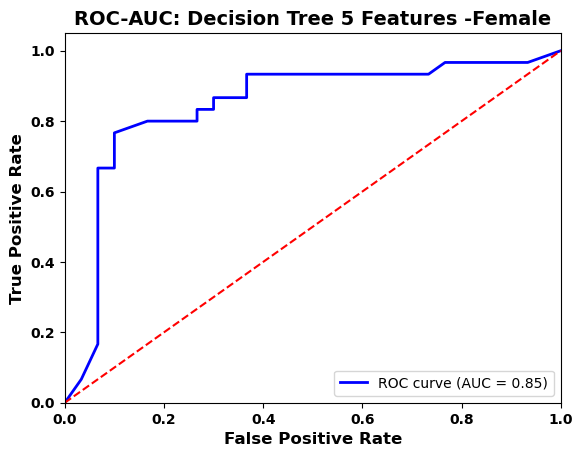

In [29]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Decision Tree 5 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_DecTree10Feat.svg')
plt.savefig('ROC_AUC_DecTree10Feat.pdf')
plt.show()


## Common CpG in at least two. Sample = 5

In [30]:
df = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
print(df.shape)
df.head(3)

(84, 7)


,PATNO,APPRDX,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,3002,1,1,1,0,1,2
1,3020,1,0,1,0,1,1
2,3021,1,0,0,0,0,2


In [31]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,1,1,0,1,2
1,0,0,1,0,1,1


In [32]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7833333333333334
2
Mean accuracy: 0.8333333333333334
3
Mean accuracy: 0.7833333333333333
4
Mean accuracy: 0.85
5
Mean accuracy: 0.8166666666666668
6
Mean accuracy: 0.7666666666666667
7
Mean accuracy: 0.85
8
Mean accuracy: 0.8333333333333333
9
Mean accuracy: 0.8166666666666667
10
Mean accuracy: 0.8
11
Mean accuracy: 0.7666666666666668
12
Mean accuracy: 0.8333333333333334
13
Mean accuracy: 0.8
14
Mean accuracy: 0.8666666666666666
15
Mean accuracy: 0.8166666666666667
16
Mean accuracy: 0.8
17
Mean accuracy: 0.8166666666666667
18
Mean accuracy: 0.8333333333333334
19
Mean accuracy: 0.8666666666666668
20
Mean accuracy: 0.7833333333333334
21
Mean accuracy: 0.7833333333333333
22
Mean accuracy: 0.7666666666666667
23
Mean accuracy: 0.85
24
Mean accuracy: 0.8
25
Mean accuracy: 0.7666666666666666
26
Mean accuracy: 0.7833333333333333
27
Mean accuracy: 0.8166666666666667
28
Mean accuracy: 0.85
29
Mean accuracy: 0.8166666666666668
30
Mean accuracy: 0.8833333333333332
31
Mean accurac

In [33]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_8Feat_inAny2Common_from45Feats_100RF10FCV_Female.csv", index=False)

0.8151666666666664


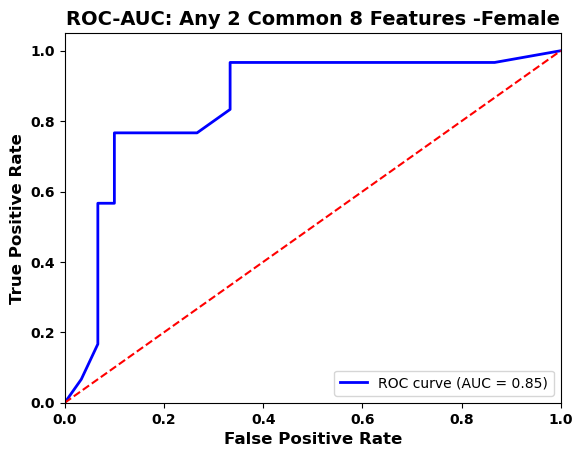

In [34]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Any 2 Common 8 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Common8Feat.svg')
plt.savefig('ROC_AUC_Common8Feat.pdf')
plt.show()


## Common CpG in all four methods. Sample = 15

In [35]:
df1 = pd.read_csv('AllCommon_inAll45Feats_Data_Female.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,Benton,LetterNumber,Lexical_Fluency,MDSP_Constipate,MDSP_LightHead,MDSP_Pain,MDSP_Urine,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,SCOPA_Sex,SCOPA_Thermo,SCOPA_Urine,Semantic,STAIS,Trail_Making_B,UPSIT
0,0,0,1,1,1,0,1,1,0,2,1,1,1,1,0,2,1,2
1,0,0,1,2,0,0,1,0,0,1,1,0,1,1,1,1,1,1


In [36]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7833333333333334
2
Mean accuracy: 0.8666666666666668
3
Mean accuracy: 0.8
4
Mean accuracy: 0.8166666666666668
5
Mean accuracy: 0.85
6
Mean accuracy: 0.7833333333333333
7
Mean accuracy: 0.7833333333333333
8
Mean accuracy: 0.7333333333333333
9
Mean accuracy: 0.8833333333333334
10
Mean accuracy: 0.8
11
Mean accuracy: 0.7499999999999999
12
Mean accuracy: 0.9000000000000001
13
Mean accuracy: 0.7166666666666666
14
Mean accuracy: 0.8666666666666668
15
Mean accuracy: 0.7833333333333333
16
Mean accuracy: 0.8
17
Mean accuracy: 0.7666666666666667
18
Mean accuracy: 0.8666666666666668
19
Mean accuracy: 0.85
20
Mean accuracy: 0.7333333333333334
21
Mean accuracy: 0.7666666666666667
22
Mean accuracy: 0.7833333333333333
23
Mean accuracy: 0.7833333333333333
24
Mean accuracy: 0.8166666666666668
25
Mean accuracy: 0.8166666666666667
26
Mean accuracy: 0.8
27
Mean accuracy: 0.8333333333333334
28
Mean accuracy: 0.8333333333333333
29
Mean accuracy: 0.8833333333333334
30
Mean accuracy: 0.8666

In [37]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_18Feat_inAllCommon_from45Feats_100RF10FCV_Female.csv", index=False)

0.8129999999999997


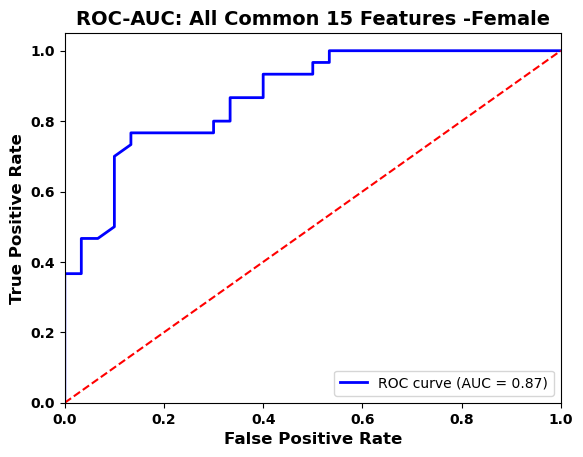

In [38]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All Common 15 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_allCommon15Feat.svg')
plt.savefig('ROC_AUC_allCommon15Feat.pdf')
plt.show()
